# Data Scientist Professional
## Example Practical Exam Solution

You can find the project information that accompanies this example solution in the resource center, [Practical Exam Resources](https://app.datacamp.com/certification/resource-center/practical-exam-resources).

## Data Validation
This data set has 6738 rows, 9 columns. I have validated all variables and I have not made any changes after validation. All the columns are just as described in the data dictionary:
 - model: character, 18 possible values 
 - year: numeric, from 1998 to 2020
 - price: numeric
 - transmission: character, four categories 
 - mileage: numeric
 - fuelType: character, four categories
 - tax: numeric
 - mpg: numeric
 - engineSize: numeric, 16 possible values


In [202]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score,mean_squared_error
plt.style.use('ggplot')

In [203]:
df = pd.read_csv('data/toyota.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [204]:
#validate possible 18 values
df['model'].nunique()

18

In [205]:
#validate year of manufacture from 1998 to 2020
df['year'].unique()

array([2016, 2017, 2015, 2020, 2013, 2019, 2018, 2014, 2012, 2005, 2003,
       2004, 2001, 2008, 2007, 2010, 2011, 2006, 2009, 2002, 1999, 2000,
       1998])

In [206]:
#validate four types of transmission
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [207]:
#validate four fuel Types
df['fuelType'].unique()

array(['Petrol', 'Other', 'Hybrid', 'Diesel'], dtype=object)

In [208]:
#validate 16 possible values in engineSize
df['engineSize'].nunique()

16

In [209]:
#validate any negative values in numeric variables
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


## Exploratory Analysis
I have investigated the target variable and features of the car, and the relationship between target variable and features. After the analysis,I decided to apply the following changes to enable modeling:
- Price: use log transformation
- Create a new ordinal variable from tax variable

### Target Variable - Price

Since we need to predict the price, the price variable would be our target variable. From the histogram on the left below, we can see there is a longer right tail. Therefore, we apply log transforamtion of the price variable, the distribution on the right below is close to normal distribution.

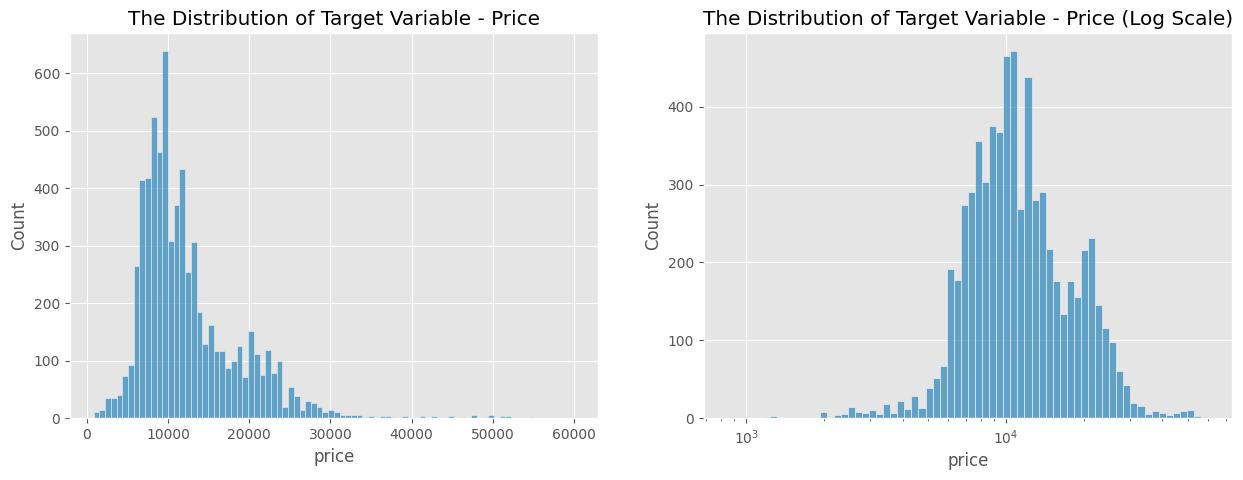

In [210]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['price'],ax=axes[0]).set(title='The Distribution of Target Variable - Price')
sns.histplot(df['price'],log_scale=True,ax=axes[1]).set(title='The Distribution of Target Variable - Price (Log Scale)');

In [211]:
df['price'] = np.log(df['price'])

### Numeric Variables - Year, Price, Mileage, Tax, mpg, Engine Size

From the heatmap below, we can conclude that there is a moderate linear positive relationship between price in log transformation and engine size and year. Also, there is a moderate to strong linear negative linear negative relationship between year and mileage.

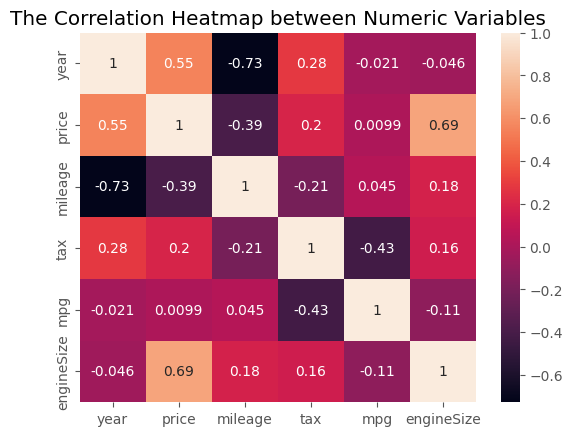

In [212]:
sns.heatmap(df.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables');

#### Distribution about year and engine size
Since year and engine size is most related to price, I checked their distribution. From the histogram below, their distribution is skewed.

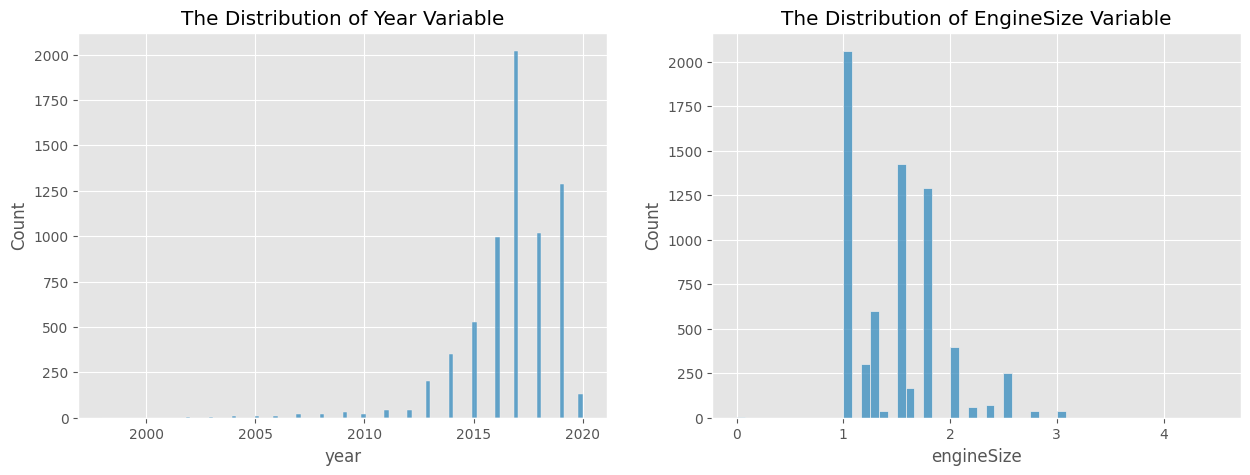

In [213]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.histplot(df['year'],ax=axes[0]).set(title='The Distribution of Year Variable')
sns.histplot(df['engineSize'],ax=axes[1]).set(title='The Distribution of EngineSize Variable');

#### Relationship between mpg, tax, mileage and price
Since I cannot intepret the linear relationship between mpg, tax and mileage and price variable from the heatmap above, I decided to make scatterplot to further investigate their non-linear relationship. From the scatterplots below, there is linear relationship between mileage and price. No relationship between price and mpg. I found out there is clusters in the scatterplot between price and tax, so I decided to create a new ordinal variable from the tax variable.

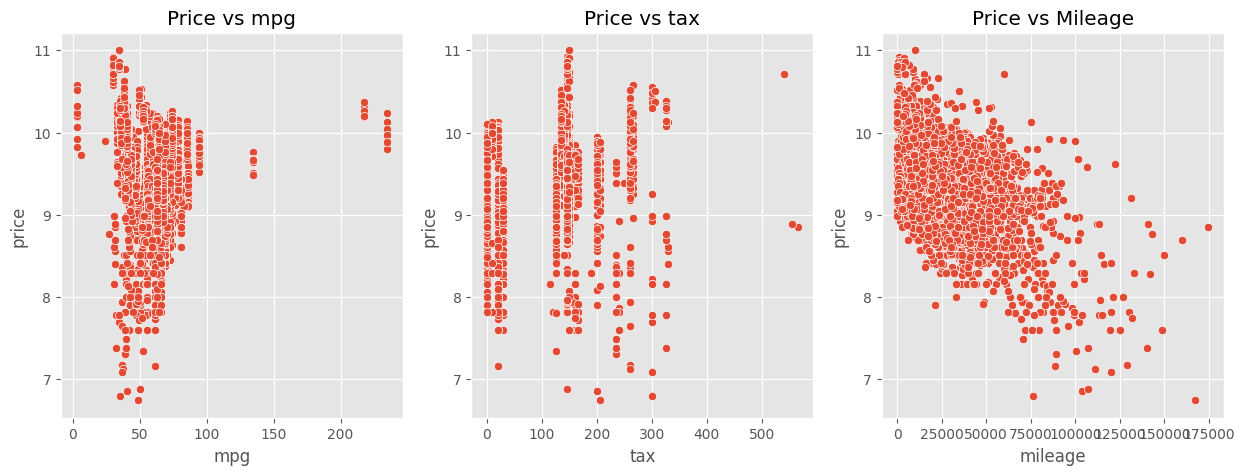

In [214]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.scatterplot(y=df['price'],x=df['mpg'],ax=axes[0]).set(title='Price vs mpg')
sns.scatterplot(y=df['price'],x=df['tax'],ax=axes[1]).set(title='Price vs tax')
sns.scatterplot(y=df['price'],x=df['mileage'],ax=axes[2]).set(title='Price vs Mileage');

In [215]:
# Convert tax variable into an ordinal variable  
df.loc[(df['tax'] <= 100,'tax')] = 1
df.loc[((df['tax'] <= 200) & (df['tax'] > 100) ,'tax')] = 2
df.loc[((df['tax'] <= 300) & (df['tax'] > 200) ,'tax')] = 3
df.loc[(df['tax'] > 300 ,'tax')] = 4

### Categorical Variables - Model, Transmission, fuelType

From the bar charts below, we can see the most frequent categories in model, transmission and fuelType variables - Yaris, Manual, Petrol in the dataset. I also investigated their relationship between price. From the boxplots below, we can see there is a difference in distribution of prices among each categories in each variable.

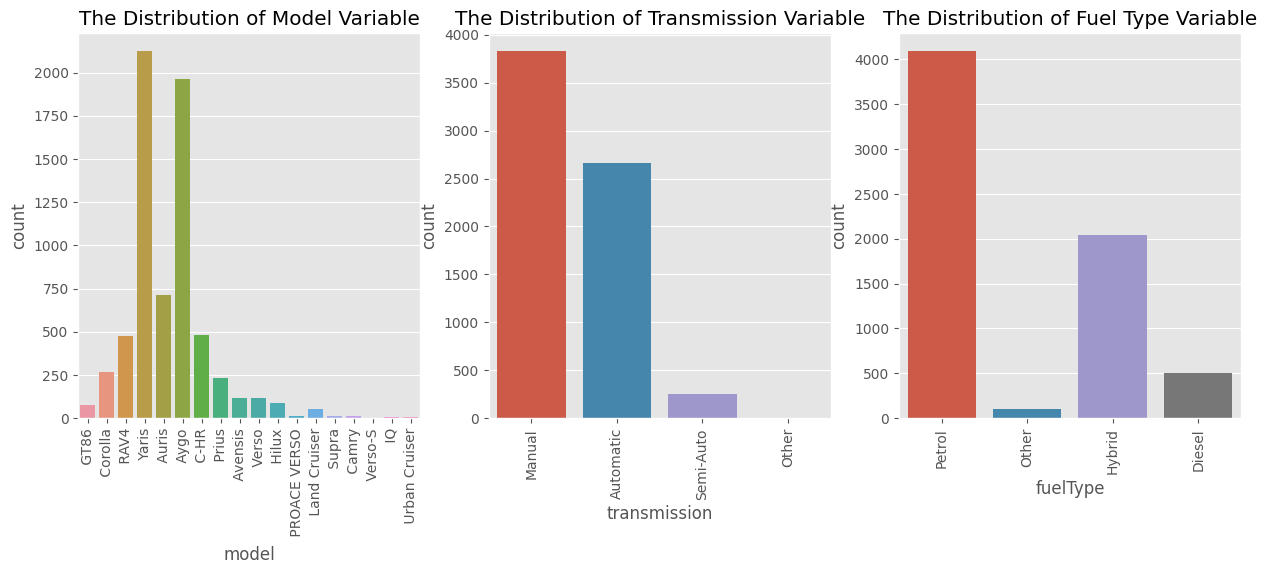

In [216]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
sns.countplot(df['model'],ax=axes[0]).set(title='The Distribution of Model Variable')
sns.countplot(df['transmission'],ax=axes[1]).set(title='The Distribution of Transmission Variable')
sns.countplot(df['fuelType'],ax=axes[2]).set(title='The Distribution of Fuel Type Variable')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

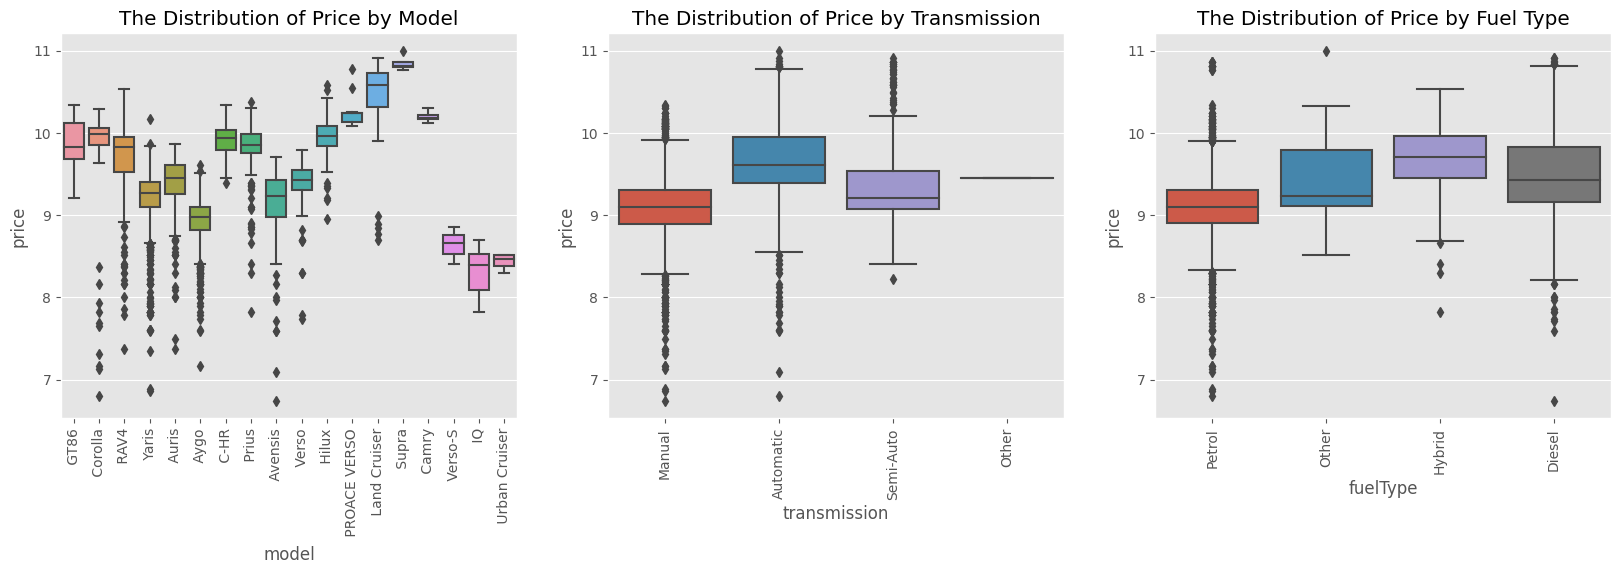

In [217]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(data=df, x='model',y='price',ax=axes[0]).set(title='The Distribution of Price by Model')
sns.boxplot(data=df, x='transmission',y='price',ax=axes[1]).set(title='The Distribution of Price by Transmission')
sns.boxplot(data=df, x='fuelType',y='price',ax=axes[2]).set(title='The Distribution of Price by Fuel Type')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90);

## Model Fitting & Evaluation
Predicting the price is a regression problem in machine learning. I am choosing the Linear Regression model because we can see strong to moderate relationship between some features and target variable. The comparison model I am choosing is the Decision Tree regression model because it is easy to interpret with independence from outliers.

For the evaluation, I am choosing **R squared** and **RMSE (Root Mean Squared Error)** to evaluate the model. R squared measures how well the model fits dependent variables (i.e. features). RMSE measures how much your predicted results deviate from the actual number. 

### Prepare Data for Modelling
To enable modelling, we chose year,model,transmission,mileage,fuelType,tax,engineSize as features, price as target variables. I also have made the following changes:
- Normalize the numeric features
- Convert the categorical variables into numeric features
- Split the data into a training set and a test set

In [218]:
labelencoder = LabelEncoder()
df['model'] = labelencoder.fit_transform(df['model'])
df['transmission'] = labelencoder.fit_transform(df['transmission'])
df['fuelType'] = labelencoder.fit_transform(df['fuelType'])

In [219]:
feature_cols = ['year','transmission','fuelType','engineSize','tax','model','mileage']
X = df[feature_cols] # Features
y = df['price'] # Target variable

In [220]:
# define the scaler 
scaler = PowerTransformer()
# fit and transform the train set
X[['year','engineSize','mileage']] = scaler.fit_transform(X[['year','engineSize','mileage']])

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Linear Regression Model

In [222]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [223]:
y_pred = lr.predict(X_test)
print('Linear Regression r2_score: ',r2_score(y_test,y_pred))
print('Linear Regression Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,y_pred)))

Linear Regression r2_score:  0.8581849472893514
Linear Regression Root Mean Squared Error:  0.17887225612192453


#### Finding the feature importance

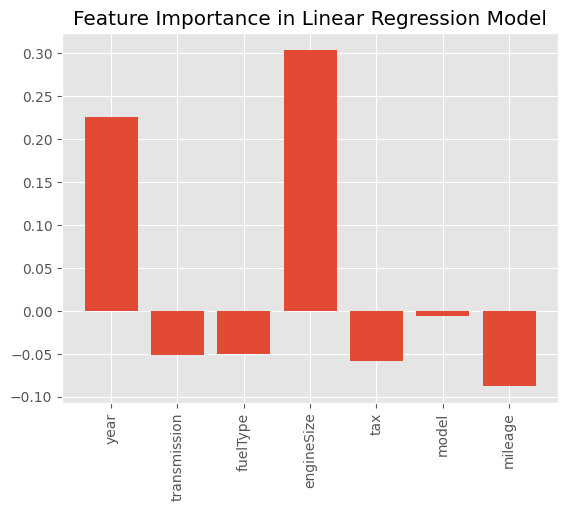

In [224]:
resultdict = {}
for i in range(len(feature_cols)):
    resultdict[feature_cols[i]] = lr.coef_[i]
    
plt.bar(resultdict.keys(),resultdict.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Linear Regression Model');

### Decision Tree Regression Model

In [225]:
tree = DecisionTreeRegressor(max_depth=12,min_samples_split=2,random_state=42)
tree.fit(X_train,y_train)
y_pred2 = tree.predict(X_test)

In [226]:
d_r2 = tree.score(X_test, y_test)
print("Decision Tree Regressor R-squared: {}".format(d_r2))

d_mse = mean_squared_error(y_pred2, y_test)
d_rmse = np.sqrt(d_mse)
print("Decision Tree Regressor RMSE: {}".format(d_rmse))

Decision Tree Regressor R-squared: 0.9378957123254383
Decision Tree Regressor RMSE: 0.11837026281480763


#### Finding the best parameter for Decision Tree Regression Model

Best max_depth is: 12 
Testing R^2 is: 0.9378957123254383


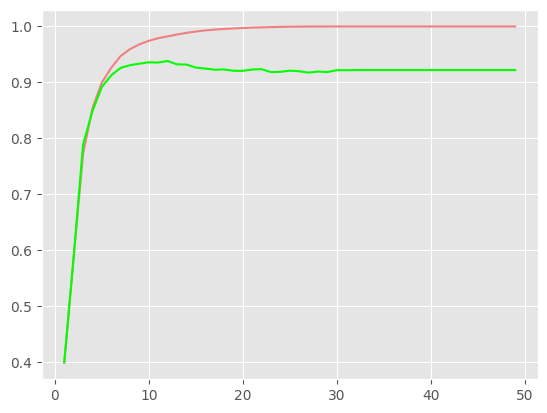

In [227]:
train_score = []
test_score = []
max_score = 0
max_pair = (0,0)

for i in range(1,50):
    tree = DecisionTreeRegressor(max_depth=i,random_state=42)
    tree.fit(X_train,y_train)
    y_pred = tree.predict(X_test)
    train_score.append(tree.score(X_train,y_train))
    test_score.append(r2_score(y_test,y_pred))
    test_pair = (i,r2_score(y_test,y_pred))
    if test_pair[1] > max_pair[1]:
        max_pair = test_pair

fig, ax = plt.subplots()
ax.plot(np.arange(1,50), train_score, label = "Training R^2",color='lightcoral')
ax.plot(np.arange(1,50), test_score, label = "Testing R^2",color='lime')
print(f'Best max_depth is: {max_pair[0]} \nTesting R^2 is: {max_pair[1]}')

#### Finding the feature importance

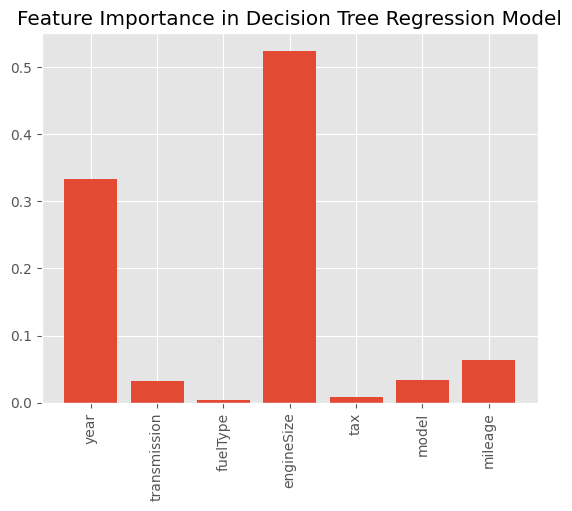

In [228]:
importance = tree.feature_importances_

f_importance = {}
for i in range(len(feature_cols)):
     f_importance[feature_cols[i]] = importance[i]
        
plt.bar(f_importance.keys(),f_importance.values())
plt.xticks(rotation='vertical')
plt.title('Feature Importance in Decision Tree Regression Model');

## Results
The R squared of the Linear Regression, and the Decision Tree Regression model is 0.86 and 0.94, meaning the **Decision Tree Regression model fits the features better.** The RMSE of the Linear Regression, and the Decision Tree Regression model is 0.18 and 0.12, meaning the **Decision Tree Regression model has less error in predicting values.**

### Evaluate by Business Criteria
The company wants to avoid prediction out of a range - more than £1500 higher from actual price. Therefore, we would consider using percentage of predictions which predicted price is not more than £1500 higher than actual price as a KPI to compare the two models again. The higher the percentage, the better the model performs. 90% of the decision tree regressor prediction is not more than £1500 higher than actual sell price, while the linear regression model only have 87%.

In [229]:
X_test['Predicted_price'] = np.round(np.exp(y_pred),0)
X_test['Price'] = np.round(np.exp(y_test),0)
lr_e = X_test

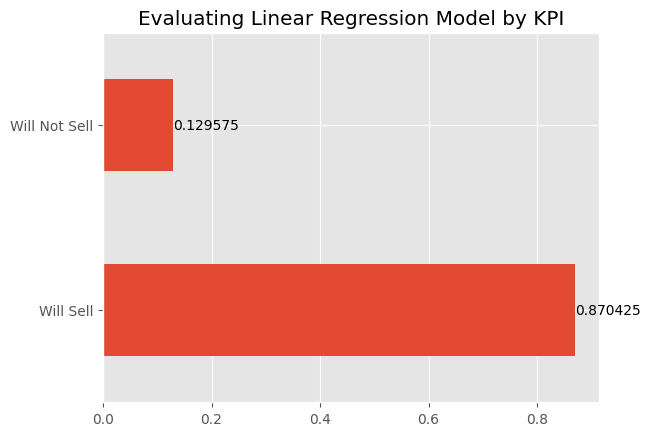

In [230]:
lr_e['Diff'] = lr_e['Predicted_price'] - lr_e['Price']
lr_e['Result'] =  lr_e['Diff'] > 1500
lr_e['Category'] = lr_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = lr_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Linear Regression Model by KPI');

In [231]:
X_test['Predicted_price'] = np.round(np.exp(y_pred2),0)
X_test['Price'] = np.round(np.exp(y_test),0)
tree_e = X_test

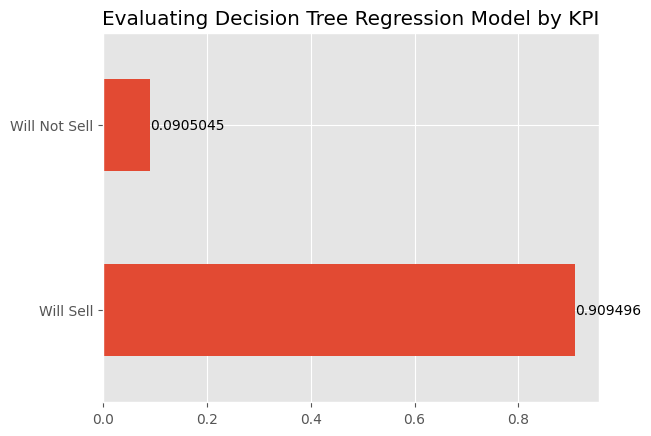

In [232]:
tree_e['Diff'] = tree_e['Predicted_price'] - tree_e['Price']
tree_e['Result'] =  tree_e['Diff'] > 1500
tree_e['Category'] = tree_e['Result'].apply(lambda x: 'Will Not Sell' if x == True else 'Will Sell')
ax = tree_e['Category'].value_counts(normalize=True).plot.barh()
ax.bar_label(ax.containers[0])
ax.set_title('Evaluating Decision Tree Regression Model by KPI');

## Recommendation 

To help junior salespeople better predict the price, we can deploy this **Decision Tree Regression Model** into production. By implementing this model, about 91% of the prediction will make sure the cars is very likely to be sold. This will help junior salespeople build their confidence in generating more sales.

To better evaluate whether this model can really help junior salespeople price used cars, I would also recommend A/B testing about using this model to compare two groups of junior salespeople. 

To implement and improve the model, I will consider the following steps:
- Looking for best ways to deploy this model in terms of performance and costs. The ideal way is to deploy this machine learning model on edge devices such as mobile and IoT for its convenience and security.  However, this might need some work. I will suggest deploying as web services first since it is the easiest way and test the model in newly hired junior salespeople.

- Collecting more data, e.g. time and economic data, the inflation has a huge influence on the car price recently

- Feature Engineering, e.g  reduce the categories in model, create more meaningful features from the variables.



